In [22]:
# !pip install torch

In [1]:
words = open("rocities.txt", "r").read().splitlines()

In [2]:
words[:10]

['1 DECEMBRIE',
 '2 MAI',
 '23 AUGUST',
 'ABRAM',
 'ABRAMUT',
 'ABRUD',
 'ABRUD-SAT',
 'ABUCEA',
 'ABUD',
 'ABUS']

In [3]:
len(words)

10148

In [4]:
min(len(w) for w in words)

3

In [5]:
max(len(w) for w in words)

33

In [11]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [21]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]

[(('I', '<E>'), 3726),
 (('A', '<E>'), 2515),
 (('T', 'I'), 2021),
 (('S', 'T'), 2005),
 (('E', 'S'), 1736),
 (('A', 'R'), 1653),
 (('N', 'I'), 1650),
 (('A', 'N'), 1520),
 (('<S>', 'C'), 1395),
 (('R', 'A'), 1316)]

In [23]:
import torch

In [70]:
chars = sorted(list(set(''.join(words))))
count_chars = len(chars)
stoi = {s: i + 1 for i,s in enumerate(chars)}
stoi['*'] = 0
itos = {i: s for s,i in stoi.items()}
count_all_chars = len(stoi.keys())

In [71]:
N = torch.zeros((count_all_chars+1, count_all_chars+1), dtype=torch.int32)

In [72]:
for w in words:
    chs = ['*'] + list(w) + ['*']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

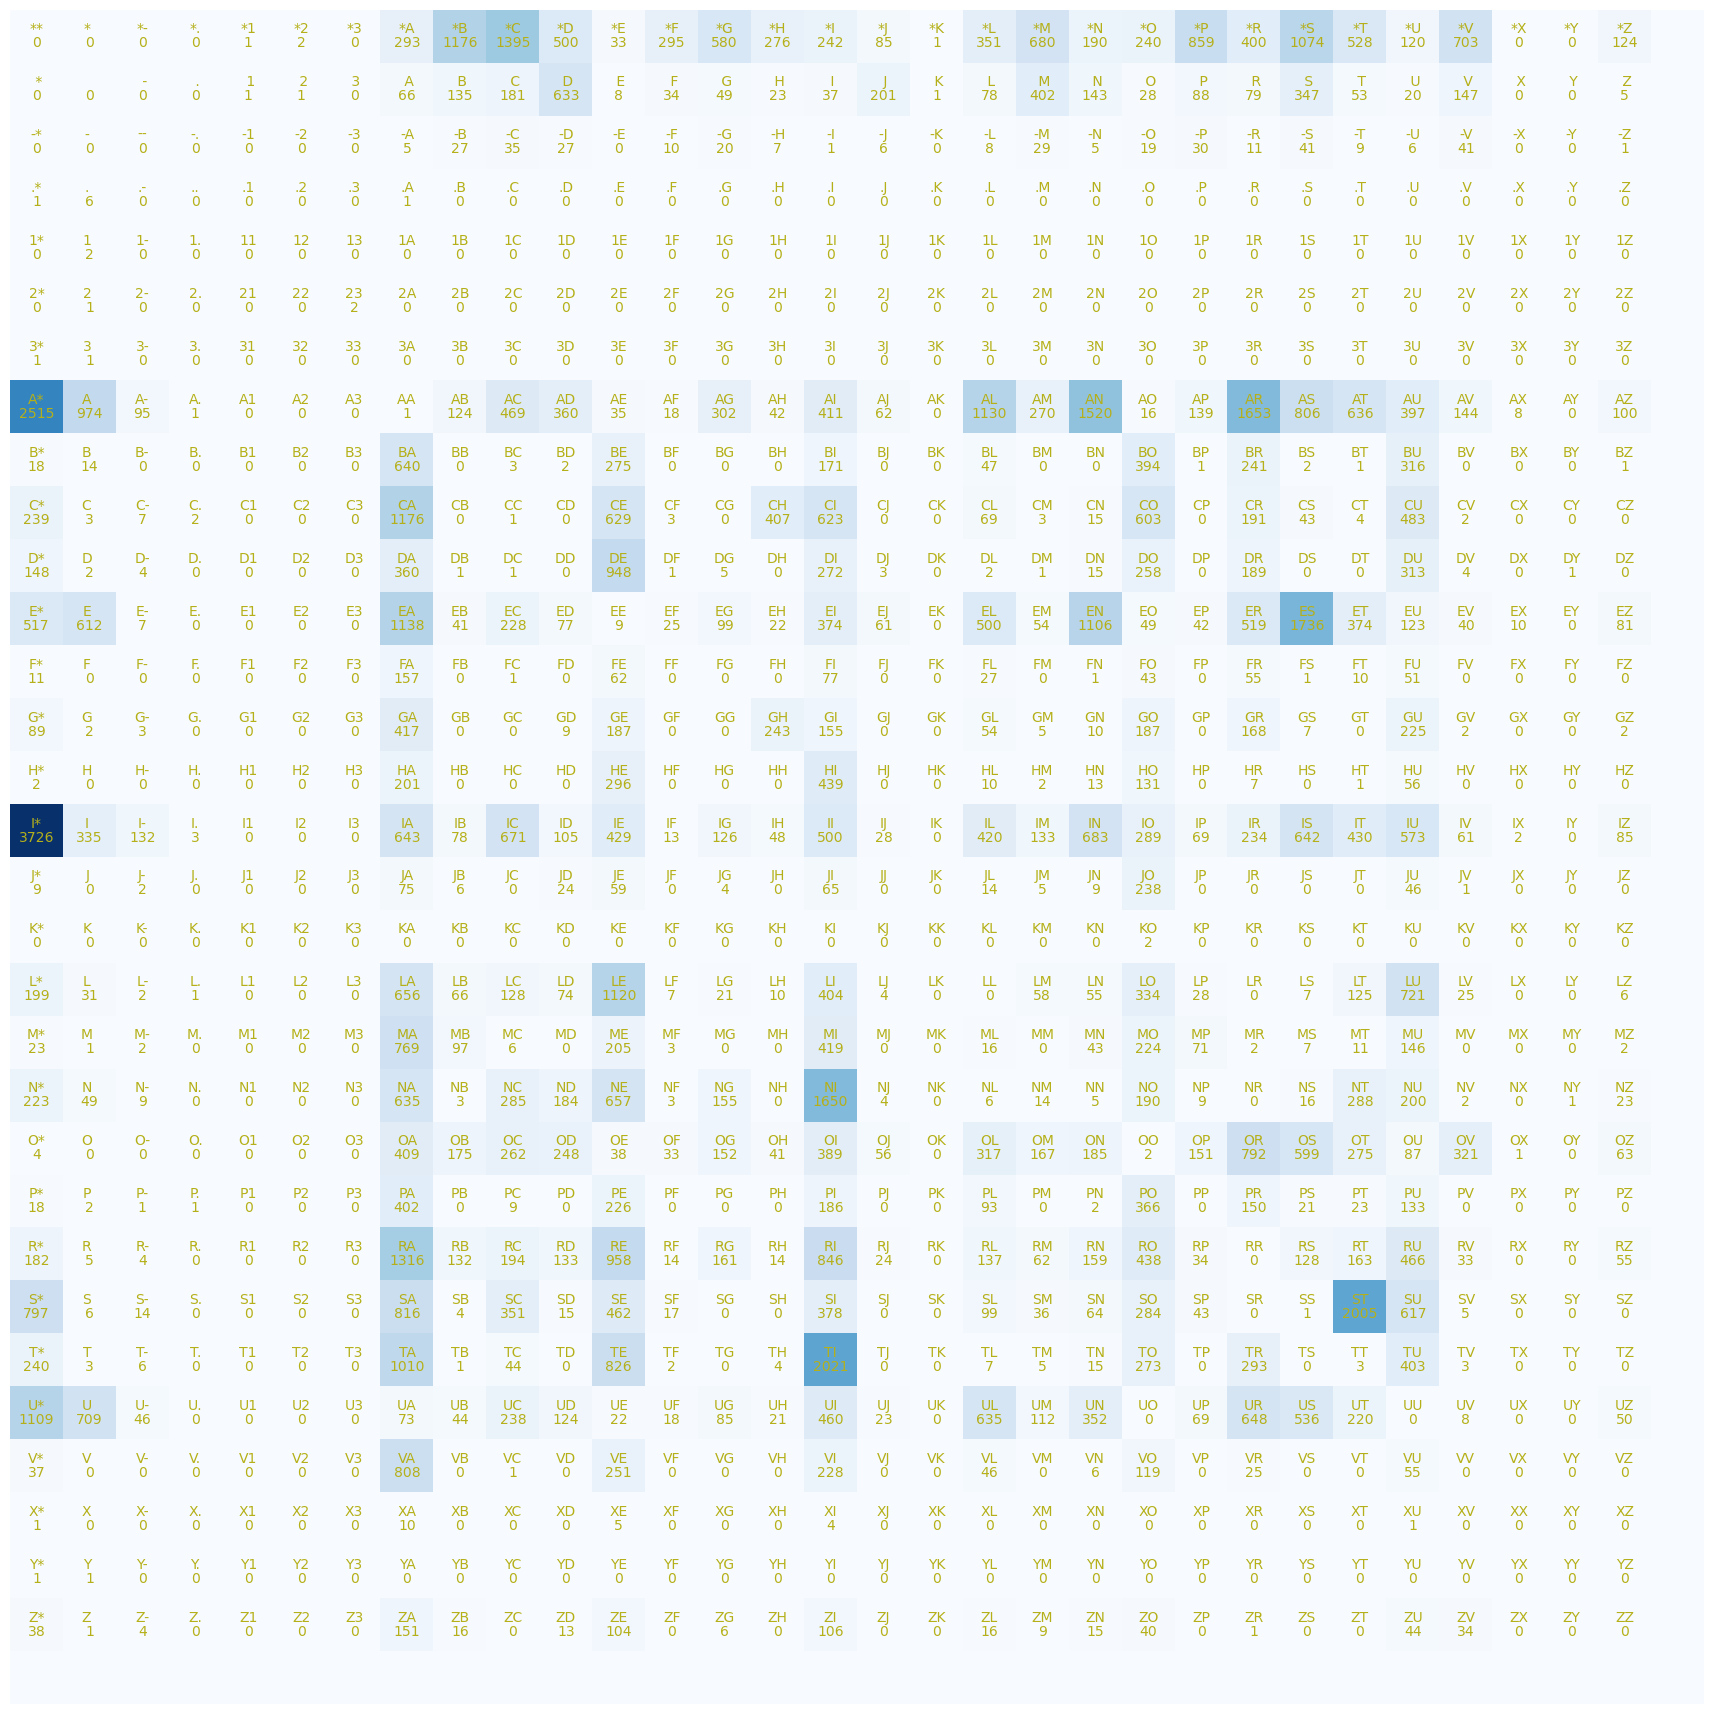

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(22,22))
plt.axis('off')
plt.imshow(N, cmap='Blues')
for i in range(count_all_chars):
    for j in range(count_all_chars):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='#b5b019')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='#b5b019')

In [77]:
N[0]

tensor([   0,    0,    0,    0,    1,    2,    0,  293, 1176, 1395,  500,   33,
         295,  580,  276,  242,   85,    1,  351,  680,  190,  240,  859,  400,
        1074,  528,  120,  703,    0,    0,  124,    0], dtype=torch.int32)

In [93]:
p = N[0].float()
p = p / p.sum()
p, p.sum()

(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.8542e-05, 1.9708e-04,
         0.0000e+00, 2.8873e-02, 1.1588e-01, 1.3747e-01, 4.9271e-02, 3.2519e-03,
         2.9070e-02, 5.7154e-02, 2.7197e-02, 2.3847e-02, 8.3760e-03, 9.8542e-05,
         3.4588e-02, 6.7008e-02, 1.8723e-02, 2.3650e-02, 8.4647e-02, 3.9417e-02,
         1.0583e-01, 5.2030e-02, 1.1825e-02, 6.9275e-02, 0.0000e+00, 0.0000e+00,
         1.2219e-02, 0.0000e+00]),
 tensor(1.0000))

In [96]:
seed = 2147483647
g = torch.Generator().manual_seed(seed)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'D'

In [86]:
seed = 2147483647
g = torch.Generator().manual_seed(seed)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [114]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([14, 25, 19, 12, 23, 15, 23, 18, 20, 12, 26,  1, 26, 18, 22, 20, 18,  0,
         9, 18, 20, 19,  0,  0, 18,  0,  0, 18, 25, 15, 20, 23, 25,  0, 23,  0,
        19, 13, 23, 18,  0, 15, 20,  1, 19, 15, 18, 20,  0, 23, 20,  1, 20, 23,
        23, 23,  0, 10,  0, 10,  0,  0, 15, 20, 20, 23, 26,  0, 10, 24,  0,  1,
         0, 20,  0, 20,  0, 20, 18, 26, 27,  0, 20, 20,  2, 18,  0,  0, 10, 20,
        23,  9, 18, 18, 18, 15, 20, 24, 10, 18])

In [115]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [116]:
P[0].sum()

tensor(1.0000)

In [117]:
seed = 21
g = torch.Generator().manual_seed(seed)

for _ in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

GOGHOSTI
BAI
BA
STANI
SINDOSA
MA FAST
PI
COLALU
BRUSAJICURUSTIENI
COIUGOVA
